<font color='blue'>

* Name: Jhonatan Nagasako
* Date: 22-FEB-2021
* Purpose: Udacity - Project 3
    * Analyze A/B Test Results

</font>

# Project: Investigate a Dataset of No-Show Appointments (in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<font color='blue'>
    
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes' if they did not show up

**Questions that will be addressed:**
1. What factors are imporant for us to know in order to predict if a patient will show up for their scheduled appointment?
        a. SCHOLARSHP vs SMS text vs Gender?
        b. What illness contributes the greatest affect to no-shows?

**Independent variables - Inputs**
1. Scholarship (boolean)
2. SMS Text message (boolean)
3. Type of Illness (boolean)

**Dependent variable - Output**
1. Will patient be a No-show? (boolean)
 
</font>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm;


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
    
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Any missing information? NO
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# duplicate PatientId information? Yes, so lets take a closer look and assess quickly for this exploration phase
# duplicateRowsPatientId = df.duplicated(subset=['PatientId'])

duplicateRowsPatientId = df[df.duplicated(['PatientId'])]
duplicateRowsPatientId.sort_values('PatientId')

#df.describe()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88585,2.263866e+07,5715081,F,2016-05-18T13:37:12Z,2016-06-08T00:00:00Z,23,INHANGUETÁ,0,0,0,0,0,1,No
83628,5.216894e+07,5704816,F,2016-05-16T16:42:19Z,2016-05-16T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
11009,6.485121e+07,5683383,F,2016-05-11T07:28:23Z,2016-05-13T00:00:00Z,29,MARUÍPE,0,0,0,0,0,0,Yes
89371,7.922850e+07,5743266,F,2016-05-30T08:51:07Z,2016-06-08T00:00:00Z,21,NOVA PALESTINA,0,0,0,0,0,1,No
105577,8.799645e+07,5786272,M,2016-06-08T08:12:09Z,2016-06-08T00:00:00Z,3,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88851,9.998774e+14,5777078,M,2016-06-06T12:56:18Z,2016-06-06T00:00:00Z,13,SANTO ANTÔNIO,0,0,0,0,0,0,No
32033,9.999320e+14,5736368,M,2016-05-25T08:14:58Z,2016-05-25T00:00:00Z,90,JABOUR,0,0,0,0,0,0,No
104616,9.999320e+14,5772701,M,2016-06-03T16:04:03Z,2016-06-07T00:00:00Z,90,JABOUR,0,0,0,0,0,1,No
62194,9.999320e+14,5616762,M,2016-04-25T14:46:41Z,2016-05-04T00:00:00Z,90,JABOUR,0,0,0,0,0,1,No


<font color='blue'>
    
### **QUALITY**
1. Assess and remove duplicated ```PatientId``` values

### **TIDINESS**
1. Headers need to be updated
        a. `Hipertension` change to `Hypertension`
        b. `Handcap` change to `Handicap`
2. Convert variables Yes/No (or Male/Female) to 1/0, respectively
        a. `No-show`
        b. `Gender`

</font>

### Data Cleaning (Replace this with more specific notes!)

#### Data Structure Review
There are quality improvements that are needed for this dataset. Specifically addressing the duplicate information in the ```PatientId``` column. After review, this duplicate information will be removed because of scope of this project. The focus will be on 1st time offenders (if any) that resulted with the "no-show" to their appoints--based on the independent variables mentioned above.

<font color='blue'>
    
##### **QUALITY - CLEANING**
1. Assess and remove duplicated ```PatientId``` values

</font>

In [5]:
# drop duplicate values of PatientId and assign to df_clean

# before cleaning
duplicateRowsPatientId = df[df.duplicated(['PatientId'])]

# sort by PatientId
duplicateRowsPatientId = duplicateRowsPatientId.sort_values('PatientId')
duplicateRowsPatientId.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88585,22638656.0,5715081,F,2016-05-18T13:37:12Z,2016-06-08T00:00:00Z,23,INHANGUETÁ,0,0,0,0,0,1,No
83628,52168938.0,5704816,F,2016-05-16T16:42:19Z,2016-05-16T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
11009,64851211.0,5683383,F,2016-05-11T07:28:23Z,2016-05-13T00:00:00Z,29,MARUÍPE,0,0,0,0,0,0,Yes
89371,79228495.0,5743266,F,2016-05-30T08:51:07Z,2016-06-08T00:00:00Z,21,NOVA PALESTINA,0,0,0,0,0,1,No
105577,87996454.0,5786272,M,2016-06-08T08:12:09Z,2016-06-08T00:00:00Z,3,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No


In [6]:
# after cleaning - not that we do NOT want to keep last occurrences--only the first occurrences for this project scope
df_clean = df.drop_duplicates(subset=['PatientId'])
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Confirmation that dataset is still operational -- no excessive lost of information
# Review the number of unique PatientId in original list
print('The number of unique PatientID =', df.PatientId.nunique())

# Review number of entries in PatientID - before cleaning
print('The number of entires in the original dataset (before cleaning) =', len(df.index))

# Review number of entries in PatientID - AFTER cleaning
print('The number of entires in the original dataset (before cleaning) =', len(df_clean.index))

The number of unique PatientID = 62299
The number of entires in the original dataset (before cleaning) = 110527
The number of entires in the original dataset (before cleaning) = 62299


<font color='blue'>

##### **TIDINESS - CLEANING**
1. Headers need to be updated
        a. `Hipertension` change to `Hypertension`
        b. `Handcap` change to `Handicap`
2. Convert variables Yes/No (or Male/Female) to 1/0, respectively
        a. `No-show`
        b. `Gender`
    
</font>

In [8]:
# Clean dataset review - before column header changes
df_clean.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
# after change
df_clean = df.rename({"Hipertension":"Hypertension","Handcap":"Handicap"}, axis='columns') 
df_clean.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# Convert No-show variables Yes/No to 1/0, respectively

# Check number of Yes/No - before cleaning
print('The number of Yes/No before cleaning: ')
df_clean['No-show'].value_counts()

The number of Yes/No before cleaning: 


No     88208
Yes    22319
Name: No-show, dtype: int64

In [11]:
df_clean['No-show'] = df_clean['No-show'].map(dict(Yes=1, No=0))

print('The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): ')
df_clean['No-show'].value_counts()

The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): 


0    88208
1    22319
Name: No-show, dtype: int64

In [12]:
df_clean['Gender'] = df_clean['Gender'].map(dict(M=1, F=0))

print('The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): ')
df_clean['Gender'].value_counts()

The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): 


0    71840
1    38687
Name: Gender, dtype: int64

In [13]:
df_clean.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
46327,4.649233e+13,5659598,1,2016-05-04T14:18:29Z,2016-05-11T00:00:00Z,40,MARIA ORTIZ,0,0,0,0,0,1,1
96698,1.443163e+10,5773384,0,2016-06-06T07:09:14Z,2016-06-06T00:00:00Z,16,PIEDADE,0,0,0,0,0,0,0
95855,5.664933e+13,5783629,0,2016-06-07T14:17:23Z,2016-06-07T00:00:00Z,60,MARIA ORTIZ,0,0,0,0,0,0,0
30431,9.351195e+12,5637643,1,2016-04-29T07:13:17Z,2016-05-09T00:00:00Z,57,CENTRO,0,0,0,0,0,0,0
84229,9.796935e+12,5737757,0,2016-05-25T10:00:09Z,2016-06-03T00:00:00Z,44,GOIABEIRAS,0,0,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis
<font color='blue'>
    
**Questions that will be addressed:**
1. What factors are imporant for us to know in order to predict if a patient will show up for their scheduled appointment?
        a. SCHOLARSHP vs SMS text vs Gender?
        b. What illness contributes the greatest affect to no-shows?

**Independent variables - Inputs**
1. Scholarship (boolean)
2. SMS Text message (boolean)
3. Types of Illness (boolean), checking every condition

**Dependent variable - Output**
1. Will patient be a No-show? (boolean) 

</font>

### Research Question 1: How does scholarship affect the no-show probability?


In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# checkout data using scatter_matrix
# pd.plotting.scatter_matrix(df_clean);

In [15]:
df_clean.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [16]:
# strip dataset of extranious information, focus on illness, gender, age, text message (SMS), and No-show condition

df = df_clean.filter(items=['PatientId', 'AppointmentID', 'Gender', 'Age', 'Scholarship', 
                                   'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'])

# do not convert the PatientId from float to int, it will error out because numbers are very big
# df['PatientId'] = df['PatientId'].astype(int)
df.sample(5)


,PatientId,AppointmentID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
105343,9.769938e+10,5735639,1,11,0,0,0,0,0,1,1
9918,8.453243e+12,5661115,0,46,1,1,0,0,0,1,0
83281,2.154446e+13,5651949,0,67,0,1,1,0,0,0,0
74907,9.654886e+12,5619380,0,15,0,0,0,0,0,1,0
90815,9.782634e+14,5772936,1,62,1,0,0,0,0,0,0


plotting help: https://stackoverflow.com/questions/43816122/how-to-represent-boolean-data-in-graph

(0.0, 110000.0)

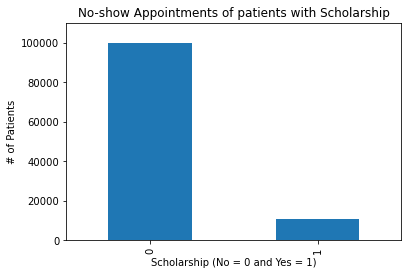

In [17]:
# No-show Appointments of patients with Scholarship
df_clean['Scholarship'].value_counts().plot(kind='bar', title='No-show Appointments of patients with Scholarship', 
                                             ylabel='# of Patients', xlabel='Scholarship (No = 0 and Yes = 1)');
plt.ylim(0, 110000)


(0.0, 110000.0)

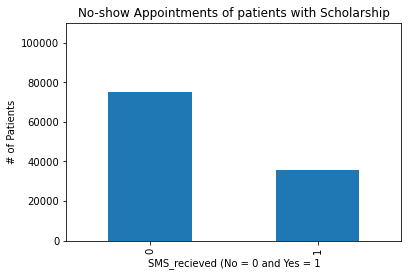

In [18]:
# No-show Appointments of patients with Scholarship
df_clean['SMS_received'].value_counts().plot(kind='bar', title='No-show Appointments of patients with Scholarship', 
                                             ylabel='# of Patients', xlabel='SMS_recieved (No = 0 and Yes = 1');
plt.ylim(0, 110000)

(0.0, 110000.0)

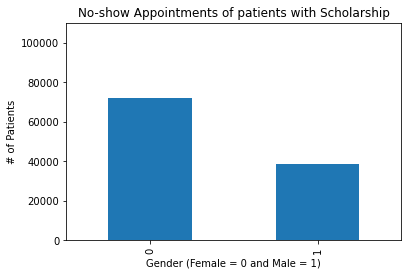

In [19]:
# No-show Appointments of patients with Scholarship
df_clean['Gender'].value_counts().plot(kind='bar', title='No-show Appointments of patients with Scholarship', 
                                             ylabel='# of Patients', xlabel='Gender (Female = 0 and Male = 1)');
plt.ylim(0, 110000)

Probability of **No-show** based on **Scholarship** review

In [20]:
# fiter dataset to only show people that did NOT show up to appointment
df_noShow = df.loc[df['No-show'] == 1]

# fiter dataset to only show people that did show up to appointment
df_show = df.loc[df['No-show'] == 0]

In [21]:
df_noShow['Scholarship'].value_counts()
a = df_noShow.query("Scholarship == 1")['Scholarship'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SCHOLARSHIP = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 2578
assert b == 19741

Probability of patient MISSING their appointment based on NO SCHOLARSHIP =  13.06%


In [22]:
test1 = df_show.groupby(['Scholarship'])['No-show'].count()
test1

Scholarship
0    79925
1     8283
Name: No-show, dtype: int64

In [23]:
df_show['Scholarship'].value_counts()
a = df_show.query("Scholarship == 1")['Scholarship'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SCHOLARSHIP = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 8283
assert b == 79925

Probability of patient *MAKING* their appointment based on SCHOLARSHIP =  10.36%


<font color='blue'>

#### There appears to be a be difference in the probability of of *No-show* appointments when considering if a patient *is or is NOT* on *Scholarship* by about 3%

#### How about SMS text messages?
    
</font>

In [24]:
test2 = df_noShow.groupby(['SMS_received'])['No-show'].count()
test2

SMS_received
0    12535
1     9784
Name: No-show, dtype: int64

In [25]:
df_noShow['SMS_received'].value_counts()
a = df_noShow.query("SMS_received == 1")['SMS_received'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SMS_received = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 9784
assert b == 12535

Probability of patient MISSING their appointment based on NO SMS_received =  78.05%


In [26]:
test3 = df_show.groupby(['SMS_received'])['No-show'].count()
test3

SMS_received
0    62510
1    25698
Name: No-show, dtype: int64

In [27]:
df_show['SMS_received'].value_counts()
a = df_show.query("SMS_received == 1")['SMS_received'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SMS_received = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 25698
assert b == 62510

Probability of patient *MAKING* their appointment based on SMS_received =  41.11%


<font color='blue'>
    
There appears to be a be difference in the probability of of **No-show** appointments when considering if a patient *is or is NOT* on **SMS_received** by about 37%!

</font>

### Research Question 2  - What illness contributes the greatest affect on "No-show" appointments?

In [28]:
# determining which illness to drop --> Handicap
df.sum(axis=0)

PatientId        1.630232e+19
AppointmentID    6.272744e+11
Gender           3.868700e+04
Age              4.099322e+06
Scholarship      1.086100e+04
Hypertension     2.180100e+04
Diabetes         7.943000e+03
Alcoholism       3.360000e+03
Handicap         2.459000e+03
SMS_received     3.548200e+04
No-show          2.231900e+04
dtype: float64

In [29]:
# focus on Scholarship and SMS_Recieved
# multiple logistic regression
df['intercept'] = 1
logit_mod = sm.Logit(df['No-show'], df[['intercept', 'Scholarship', 'SMS_received']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.494957
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                No-show   No. Observations:               110527
Model:                          Logit   Df Residuals:                   110524
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                 0.01613
Time:                        18:58:11   Log-Likelihood:                -54706.
converged:                       True   LL-Null:                       -55603.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.6314      0.010   -160.622      0.000      -1.651      -1.611
Scholarship      0.2339      0.024      9.694      0.000       0.187       0.281
SMS_received     0.6415      0.015     41.661      0.000       0.611       0.672
================================================================================
"""

In [30]:
# take exponential to understand results
np.exp(results.params)

intercept       0.195664
Scholarship     1.263476
SMS_received    1.899391
dtype: float64

In [31]:
1/_

intercept       5.110807
Scholarship     0.791468
SMS_received    0.526485
dtype: float64

In [32]:
# just focus on the illnesses
# multiple linear regression
# drop handicap because of lowest count
df['intercept'] = 1
logit_mod = sm.Logit(df['No-show'], df[['intercept', 'Hypertension', 'Diabetes', 'Alcoholism']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.502409
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                No-show   No. Observations:               110527
Model:                          Logit   Df Residuals:                   110523
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                0.001313
Time:                        18:58:11   Log-Likelihood:                -55530.
converged:                       True   LL-Null:                       -55603.
Covariance Type:            nonrobust   LLR p-value:                 1.910e-31
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.3318      0.008   -159.690      0.000      -1.348      -1.315
Hypertension    -0.2365      0.022    -10.781      0.000      -0.280      -0.194
Diabetes         0.0043      0.034      0.127      0.899      -0.061       0.070
Alcoholism       0.0438      0.044      0.999      0.318      -0.042       0.130
================================================================================
"""

In [33]:
# take exponential to understand results
np.exp(results.params)

intercept       0.263994
Hypertension    0.789368
Diabetes        1.004278
Alcoholism      1.044811
dtype: float64

In [34]:
1/_

intercept       3.787962
Hypertension    1.266836
Diabetes        0.995740
Alcoholism      0.957111
dtype: float64

<font color='blue'>
    
#### It appears that 'Hypertension' and 'Diabetes' contribute the greatest affect on 'No-show' appointments--when compared to 'Handicap' and 'Alcoholism'.

#### Let's verify those percentages below:
    
</font>

In [35]:
# function proportion calculator

# calculator for determine patients MISSING their appointment
def sickCalc_noShow(illness, illState):
    df_noShow[illness].value_counts()
    a = df_noShow.query(illState)[illness].sum()
    b = len(df_noShow) - a
    return print('Probability of patient MISSING their appointment based on NO SMS_received = ', '{0:.2%}'.format(a/b))

# calculator for determine patients *MAKING* their appointment
def sickCalc_show(illness, illState):
    df_show[illness].value_counts()
    a = df_show.query(illState)[illness].sum()
    b = len(df_show) - a
    return print('Probability of patient *MAKING* their appointment based on SMS_received = ', '{0:.2%}'.format(a/b),'\n')

#sickCalc('Hypertension', "Hypertension == 1")             
               

In [36]:
# Hypertension probability
sickCalc_noShow('Hypertension', "Hypertension == 1")
sickCalc_show('Hypertension', "Hypertension == 1") 

# Diabetes
sickCalc_noShow('Diabetes', "Diabetes == 1")
sickCalc_show('Diabetes', "Diabetes == 1") 

# Handicap
sickCalc_noShow('Handicap', "Handicap == 1")
sickCalc_show('Handicap', "Handicap == 1") 

# Alcoholism
sickCalc_noShow('Alcoholism', "Alcoholism == 1")
sickCalc_show('Alcoholism', "Alcoholism == 1") 

Probability of patient MISSING their appointment based on NO SMS_received =  20.34%
Probability of patient *MAKING* their appointment based on SMS_received =  25.69% 

Probability of patient MISSING their appointment based on NO SMS_received =  6.85%
Probability of patient *MAKING* their appointment based on SMS_received =  7.97% 

Probability of patient MISSING their appointment based on NO SMS_received =  1.67%
Probability of patient *MAKING* their appointment based on SMS_received =  1.94% 

Probability of patient MISSING their appointment based on NO SMS_received =  3.13%
Probability of patient *MAKING* their appointment based on SMS_received =  3.14% 



<a id='conclusions'></a>
## Conclusions

<font color='blue'>
    
Plots of Scholarship, SMS_received, and Gender, resulted with the following observations:
1. Despite having a scholarships, patients still tend to miss their appointments--greatest disparity is shown here too
2. Despite receiving a SMS text, patients still tend to miss there appointments
3. Males tend to miss appointments more than Females

Results indicate a notable affect with SMS text being sent to patient in determine if a patient is a 'No-show' when compared to other factors. The patient is almost 78% more likely to NOT make their appointment if a SMS text reminder is NOT sent.

Multi-variable logistic analysis of the various illnesses, pateints with 'Hypertension' tend to NOT make their appointment when compared to the other three illnesses. 

Limitations considered for this analysis: study did not consider age of the patient or location.

</font>